In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

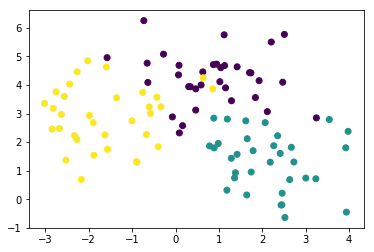

In [68]:
X, y = make_blobs(random_state=0, cluster_std=1)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [74]:
class KNNCustom:
    
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        self._X = X
        self._y = y

    def predict_point(self, point):
        
        list_dist = []
        
        for x_point, y_point in zip(self._X, self._y):
            dist_point = np.sqrt(((point - x_point) ** 2).sum())
            list_dist.append([dist_point, y_point])
        
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        return(items[np.argmax(counts)])
    
    def predict(self, X):
        
        results = []
        
        for point in X:
            results.append(self.predict_point(point))
        
        return np.array(results, dtype=int)
    
    def score(self, X, y): 
        return sum(self.predict(X) == y) / len(y)
        
    

In [75]:
model = KNNCustom(20)

In [76]:
model.fit(X, y)

In [77]:
model.predict(X[:10])

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0])

In [78]:
y[:10]

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0])

In [79]:
np.unique([1, 4, 6, 7, 7, 1], return_counts=True)

(array([1, 4, 6, 7]), array([2, 1, 1, 2]))

In [81]:
model.score(X, y)

0.9